## 1.Data collection

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
cdc_diabetes_health_indicators.variables


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


In [3]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


- importing the necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

## 2. DATA PREPROCESSING
####  Check for missing values

In [5]:

print("Missing values in features:", X.isnull().sum().sum())
print("Missing values in target:", y.isnull().sum().sum())

Missing values in features: 0
Missing values in target: 0


- Combining features and target for easier manipulation

In [6]:

data = pd.concat([X, y], axis=1)
print("\nDataset shape:", data.shape)



Dataset shape: (253680, 22)


In [7]:
print("\nBasic statistics of the dataset:")
data.describe()


Basic statistics of the dataset:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [8]:
data.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

### Checking for missing values

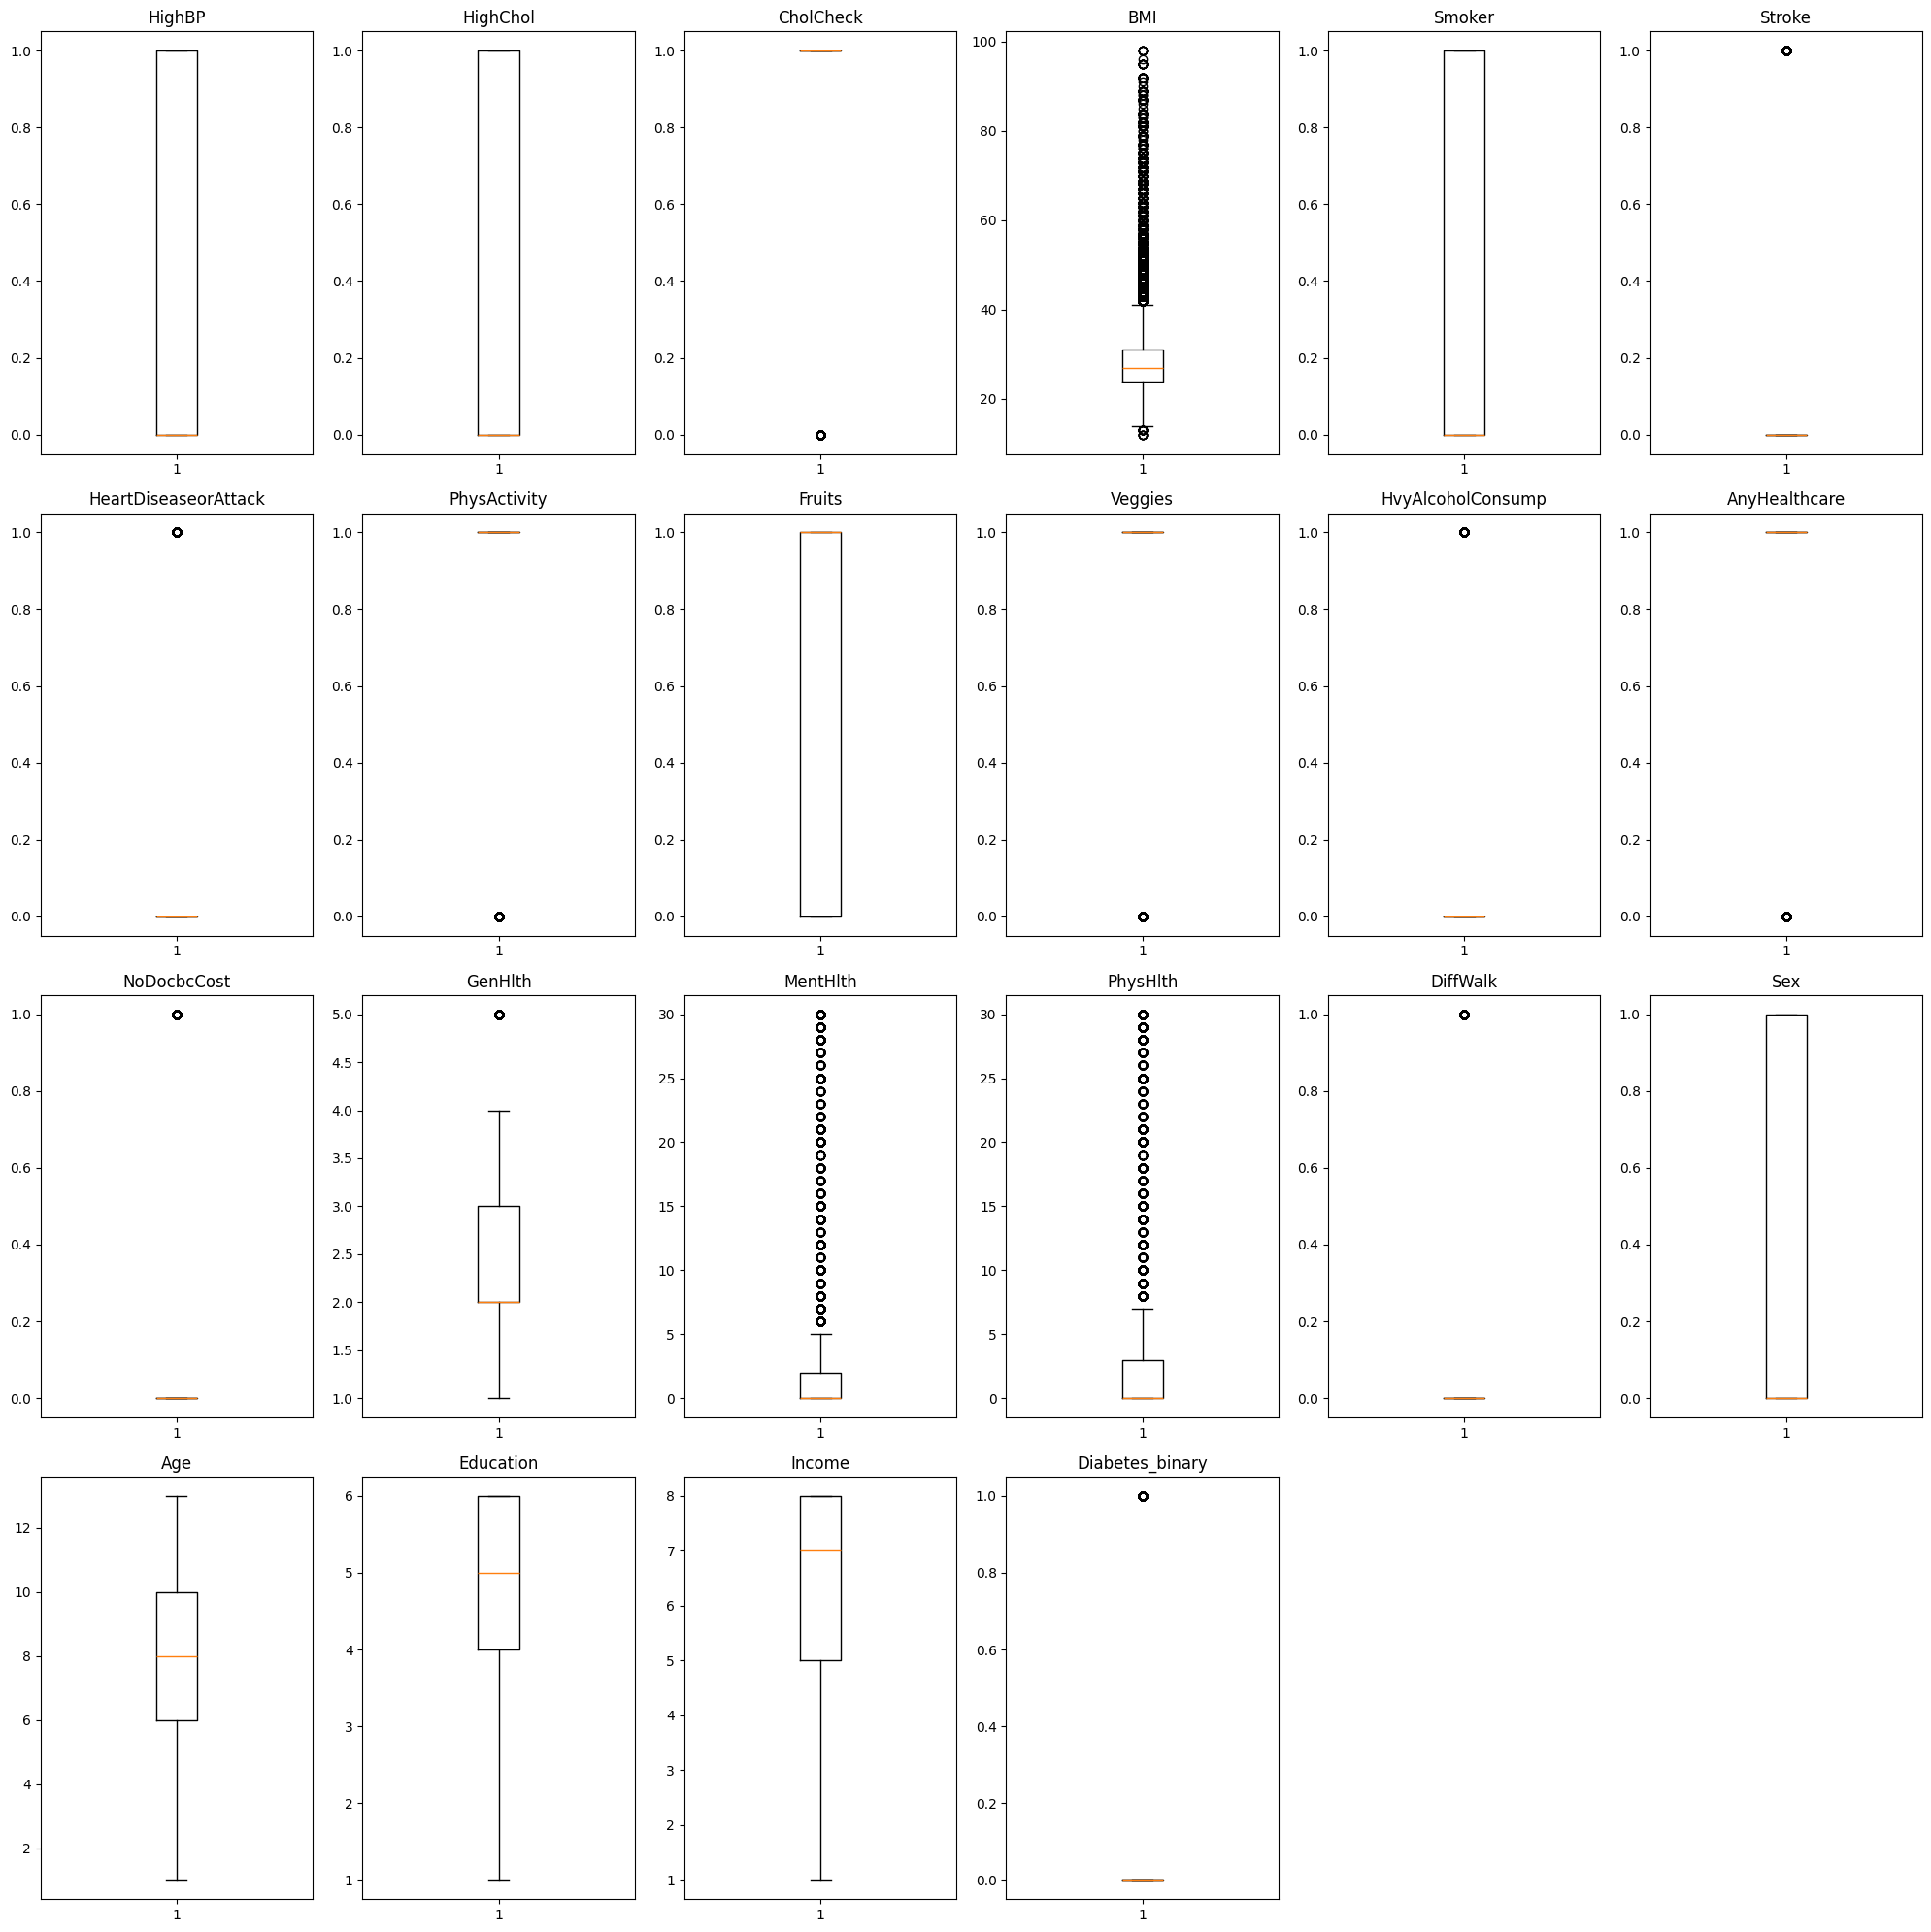

In [9]:
plt.figure(figsize=(20,20))
for i,col in enumerate(data.columns):
    plt.subplot(4,6,i+1)
    plt.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Removing outliers for columns that are not binary

In [10]:
def remove_outliers(data, columns):
    for col in columns:
        lower_quantile = data[col].quantile(.25)
        upper_quantile = data[col].quantile(.75)

        IQR = upper_quantile - lower_quantile

        lower_boundary = lower_quantile - 1.5 * IQR
        upper_boundary = upper_quantile + 1.5 * IQR
        
        data[col] = np.where(data[col]>upper_boundary, upper_boundary, data[col])
        data[col] = np.where(data[col]<lower_boundary, lower_boundary, data[col])

In [11]:
data.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [12]:
columns = ['BMI','MentHlth','PhysHlth']
remove_outliers(data,columns)

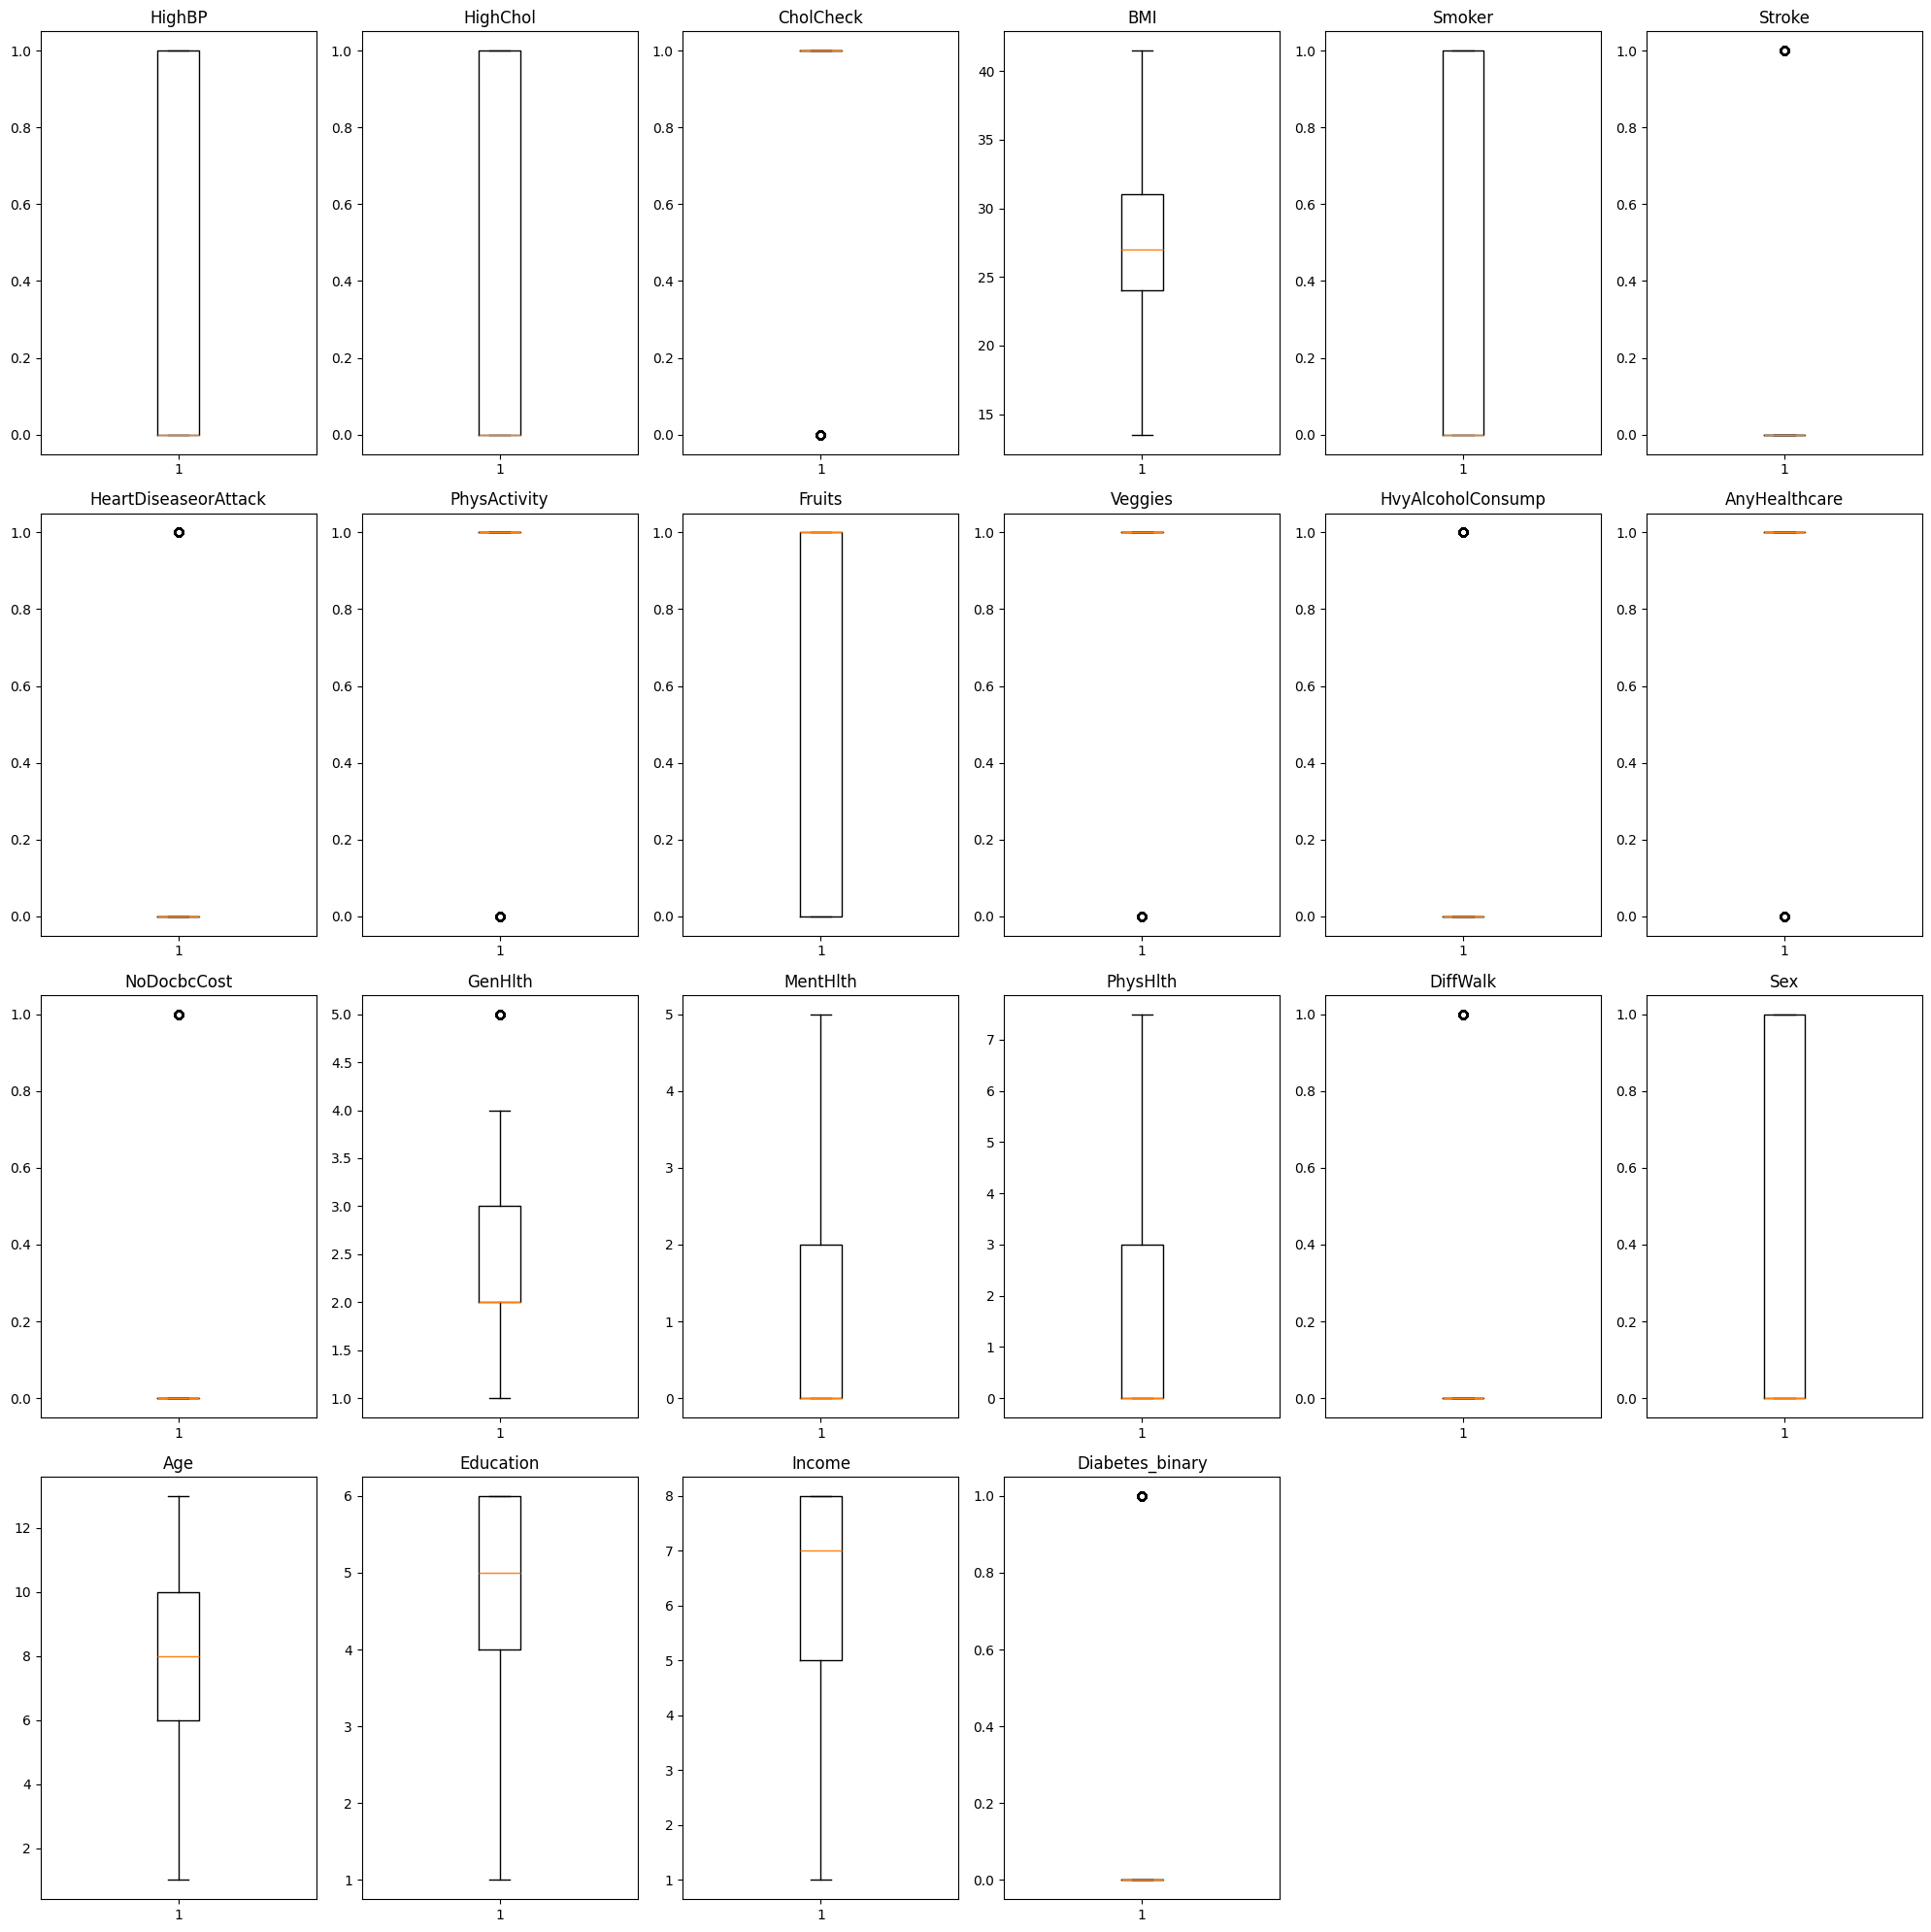

In [13]:
plt.figure(figsize=(20,20))
for i,col in enumerate(data.columns):
    plt.subplot(4,6,i+1)
    plt.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

- removing duplicates from the data

In [14]:
data = data.drop_duplicates()

## 3. EXPLORATORY DATA ANALYSIS

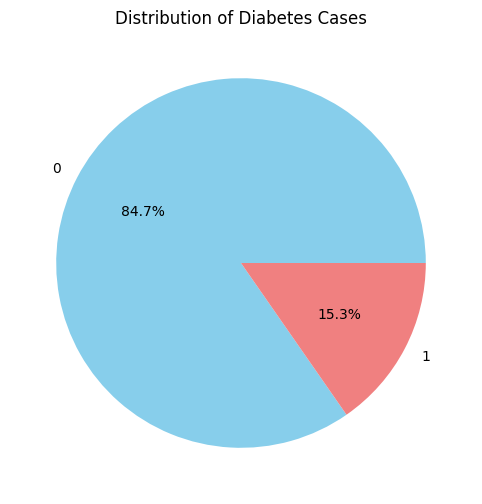

In [ ]:
# Visualizing the distribution of target variable
plt.figure(figsize=(8, 6))
data['Diabetes_binary'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Diabetes Cases')
plt.ylabel('')
plt.show()
plt.close()

### a) Exploring Disease Trends Across Demographics (as a proxy for regions)

- Diabetes prevalence by age groups

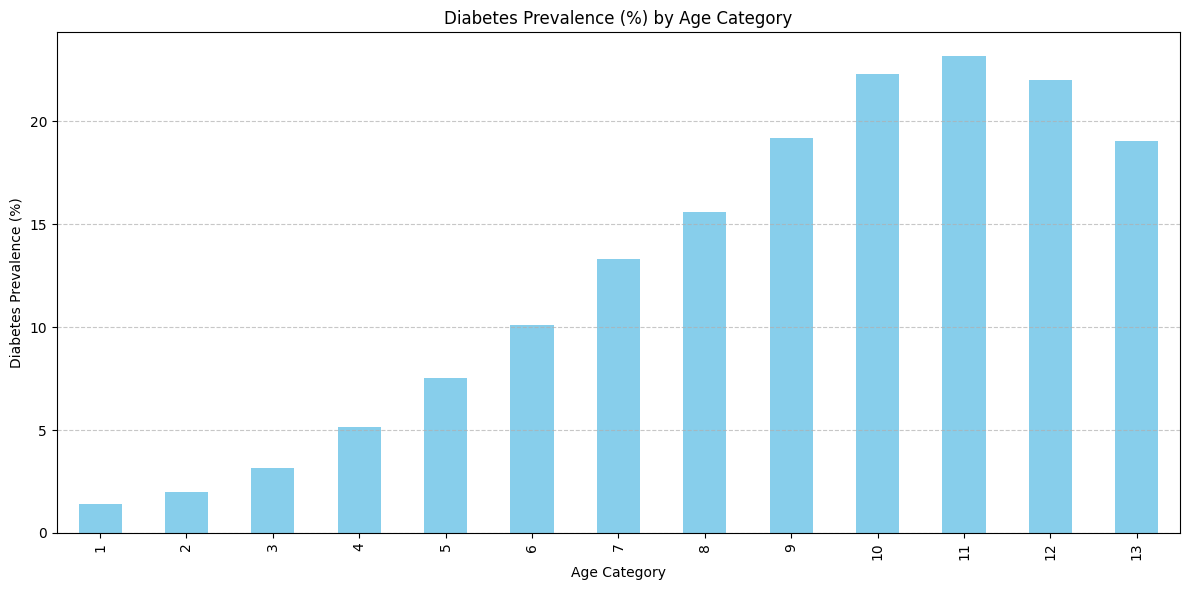

In [16]:
plt.figure(figsize=(12, 6))
diabetes_by_age = data.groupby('Age')['Diabetes_binary'].mean() * 100
diabetes_by_age.plot(kind='bar', color='skyblue')
plt.title('Diabetes Prevalence (%) by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Diabetes Prevalence (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

- Diabetes prevalence by income level

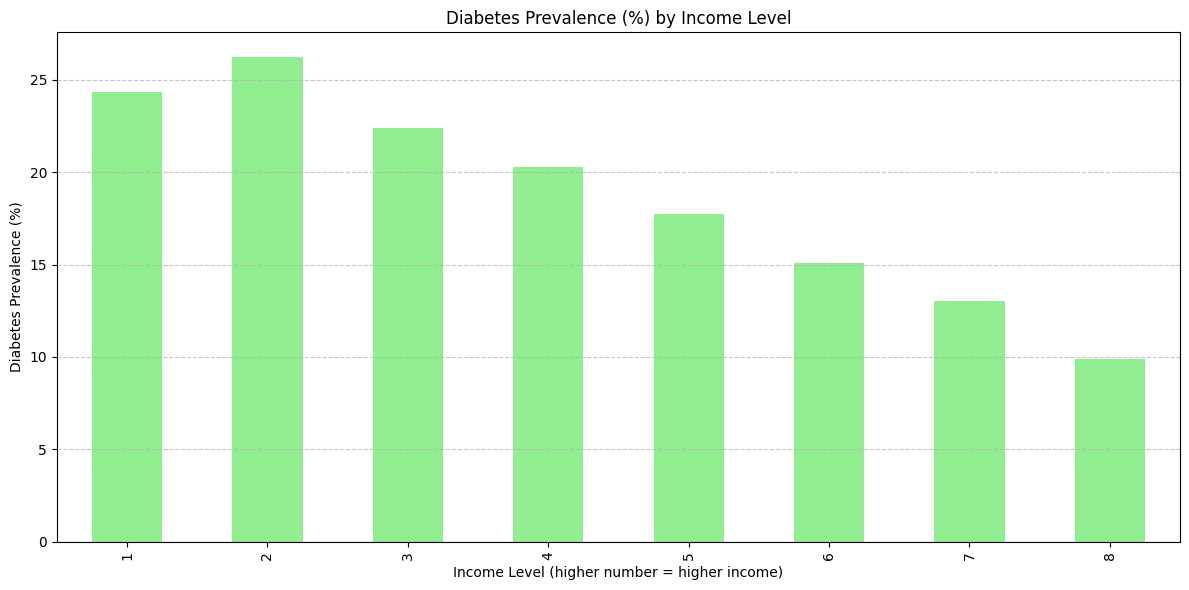

In [17]:
plt.figure(figsize=(12, 6))
diabetes_by_income = data.groupby('Income')['Diabetes_binary'].mean() * 100
diabetes_by_income.plot(kind='bar', color='lightgreen')
plt.title('Diabetes Prevalence (%) by Income Level')
plt.xlabel('Income Level (higher number = higher income)')
plt.ylabel('Diabetes Prevalence (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

- Diabetes prevalence by education level

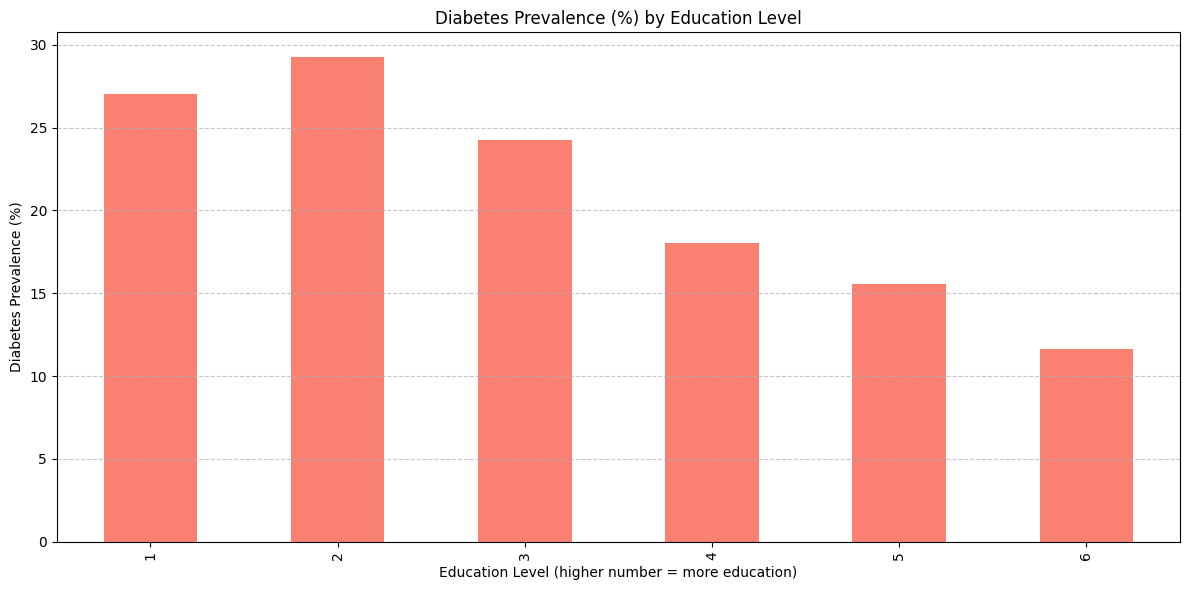

In [18]:
plt.figure(figsize=(12, 6))
diabetes_by_education = data.groupby('Education')['Diabetes_binary'].mean() * 100
diabetes_by_education.plot(kind='bar', color='salmon')
plt.title('Diabetes Prevalence (%) by Education Level')
plt.xlabel('Education Level (higher number = more education)')
plt.ylabel('Diabetes Prevalence (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

### b) Identifying Relationships Between Disease Variables and Socioeconomic/Environmental Variables

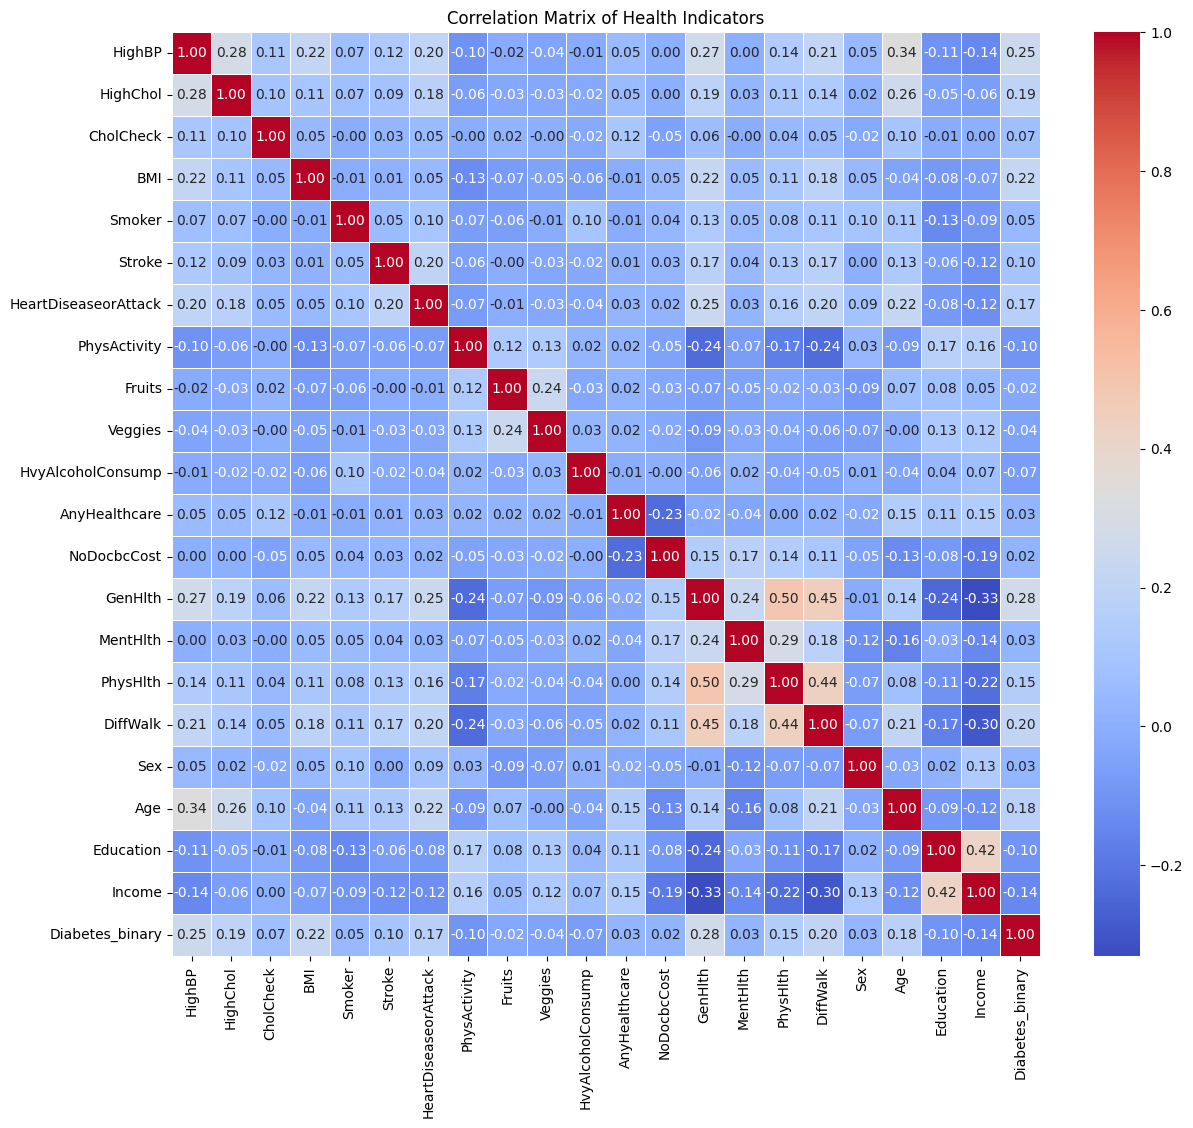

In [19]:
plt.figure(figsize=(14, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Health Indicators')
plt.show()
plt.close()

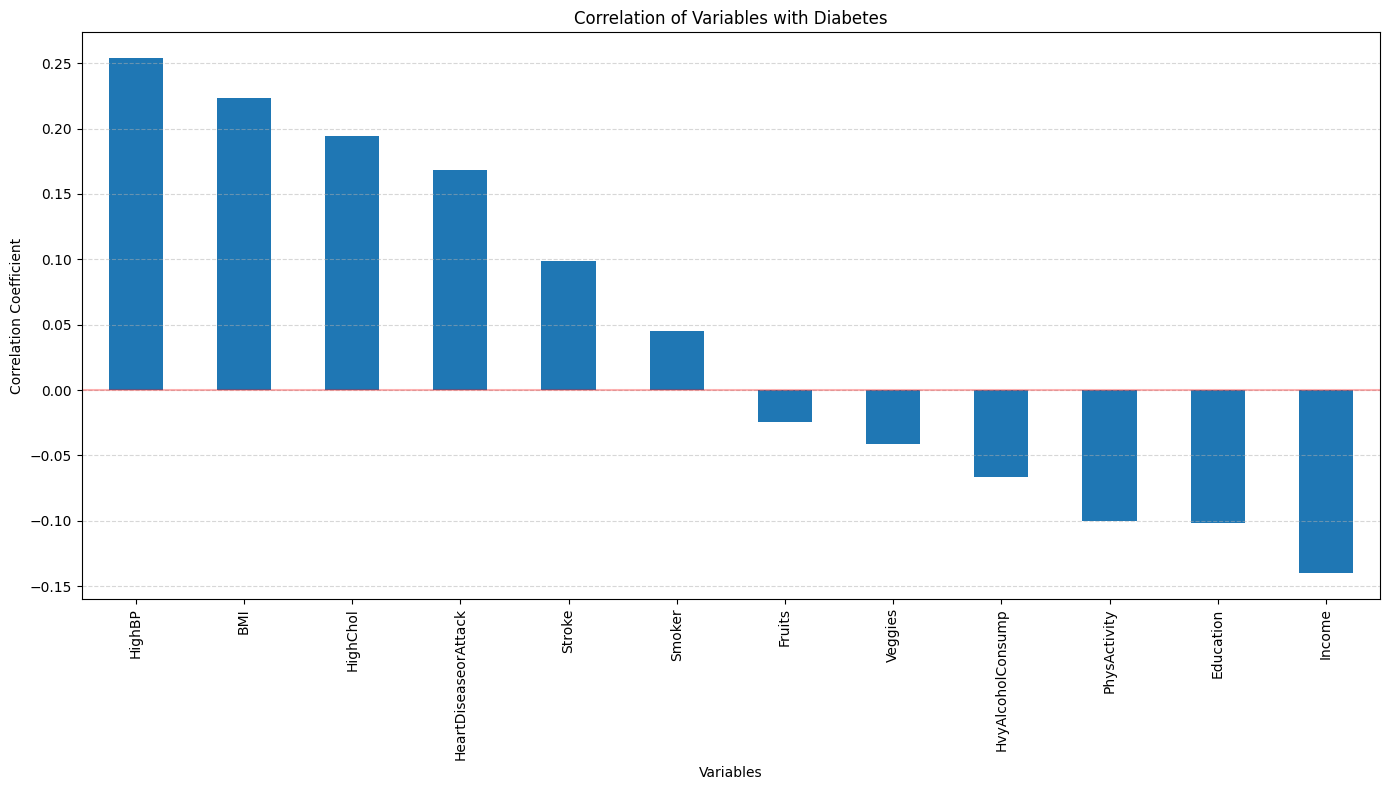

In [20]:
#socioeconomic variables
socioeconomic_vars = ['Education', 'Income']
#environmental/lifestyle variables
environmental_vars = ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Smoker', 'BMI']
#comorbidity variables
comorbidity_vars = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']

#calculating correlation with diabetes
correlation_with_diabetes = data[socioeconomic_vars + environmental_vars + comorbidity_vars + ['Diabetes_binary']].corr()['Diabetes_binary'].sort_values(ascending=False)

plt.figure(figsize=(14, 8))
correlation_with_diabetes[1:].plot(kind='bar') 
plt.title('Correlation of Variables with Diabetes')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

-  BMI distribution by diabetes status

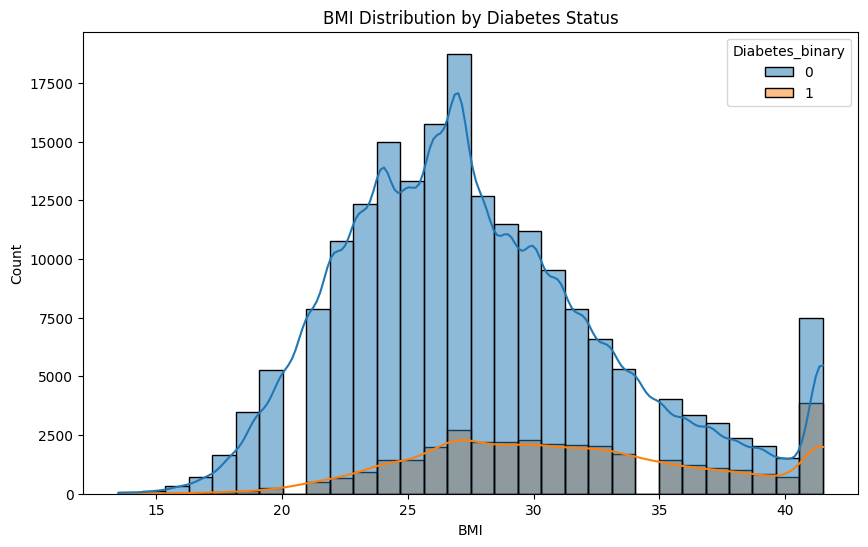

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='BMI', hue='Diabetes_binary', kde=True, bins=30)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()
plt.close()

## Health factors analysis

In [22]:
health_factors = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk']

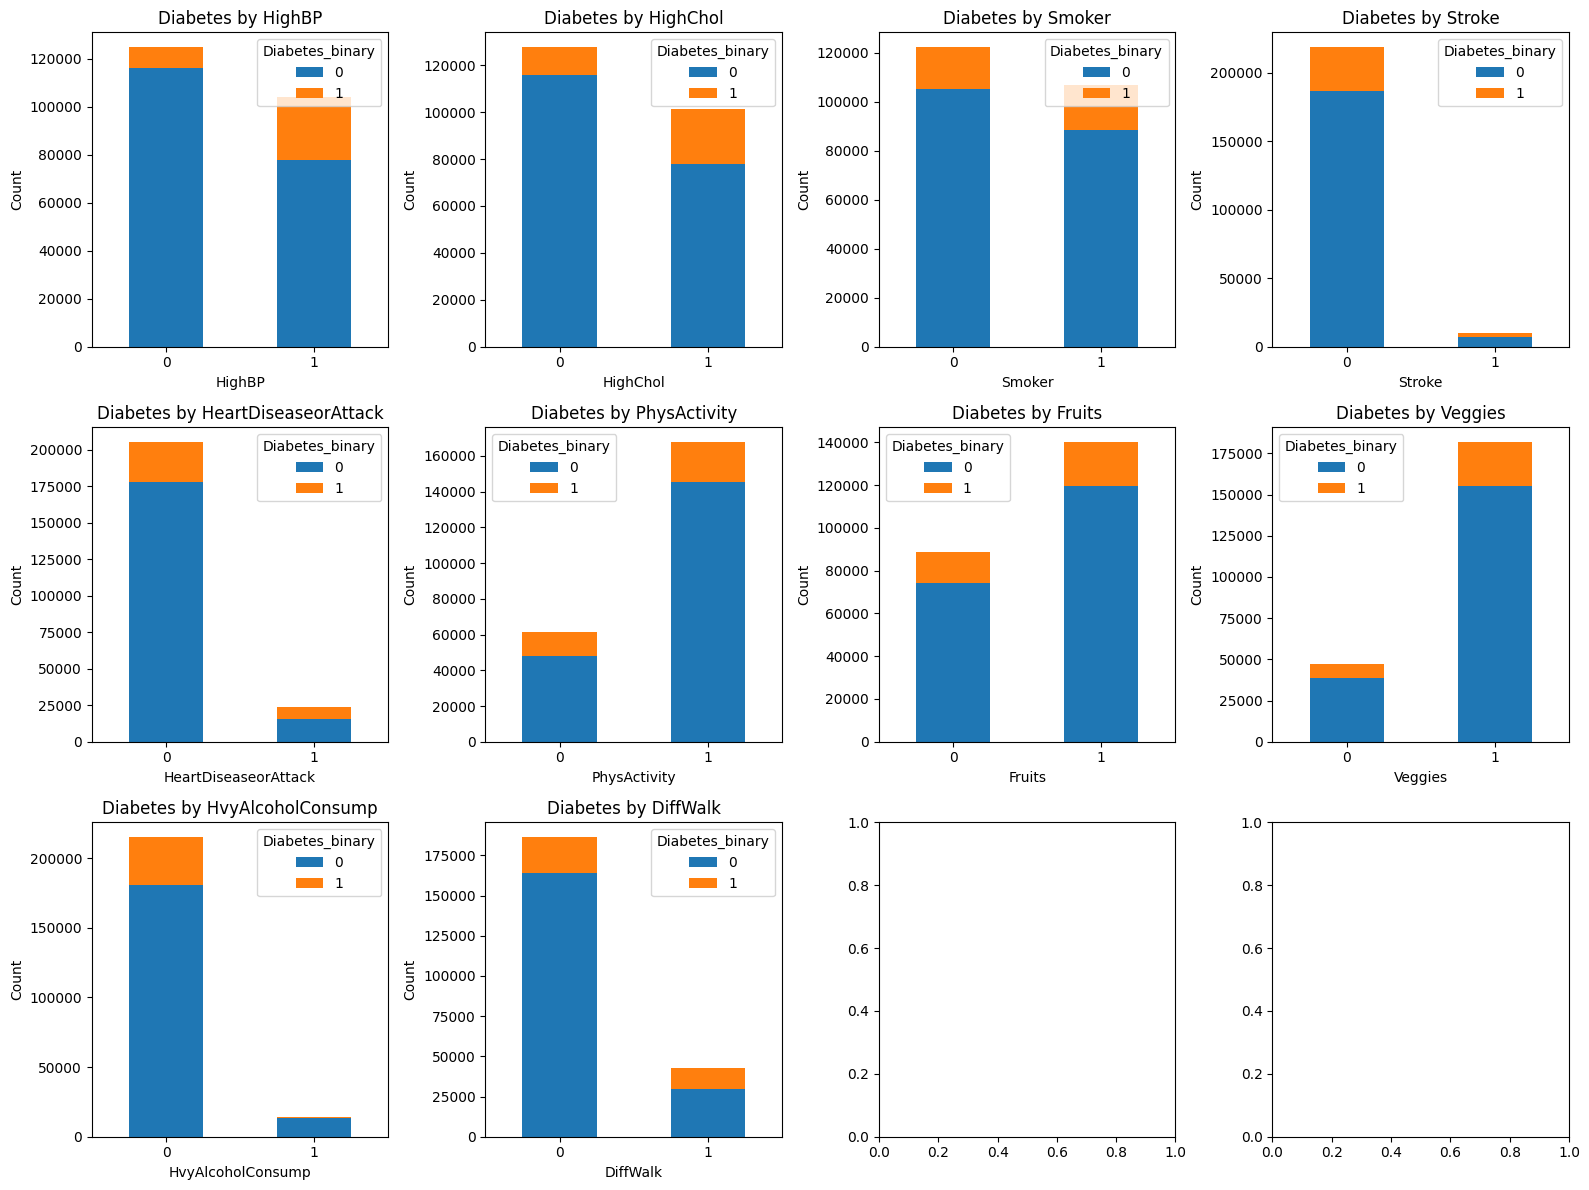

In [23]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, factor in enumerate(health_factors):
    data.groupby([factor, 'Diabetes_binary']).size().unstack().plot(
        kind='bar', stacked=True, ax=axes[i]
    )
    axes[i].set_title(f'Diabetes by {factor}')
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


## 3. FEATURE SELECTION & PREPARATION

In [ ]:
# Spliting the data
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Identifying the most important features using Random Forest
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

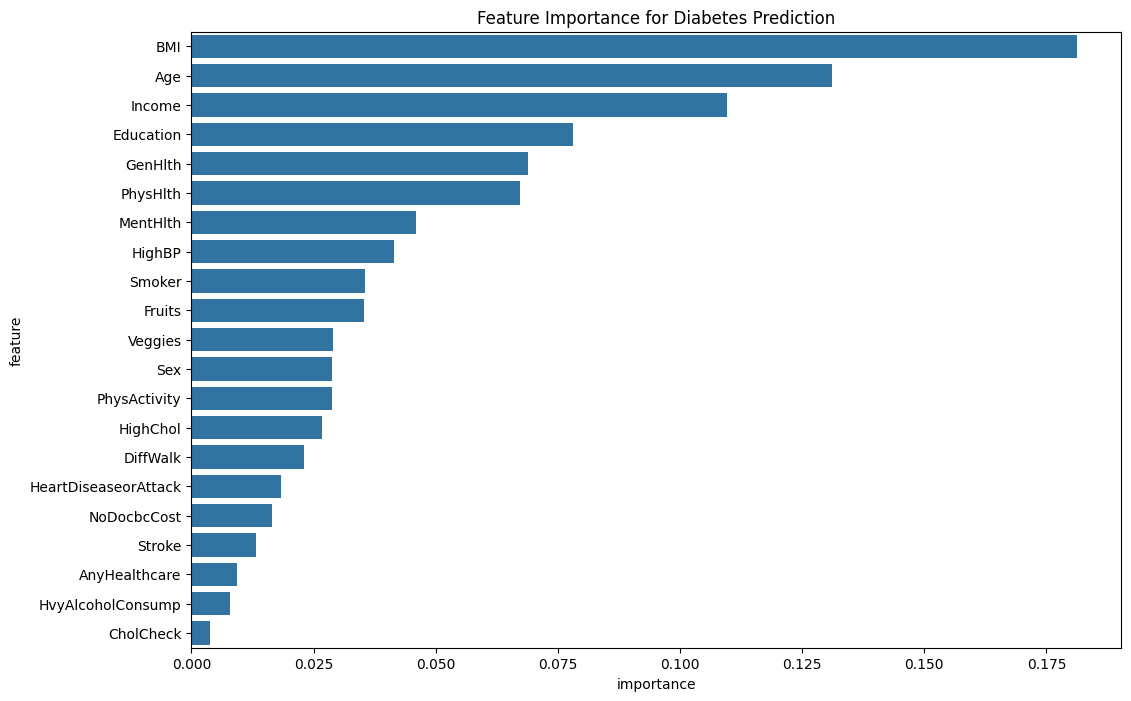

In [ ]:
# Plotting feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Diabetes Prediction')
plt.show()
plt.close()

In [ ]:
# Selecting top 10 features
top_features = feature_importance['feature'][:10].tolist()
print("\nTop 10 most important features:", top_features)


Top 10 most important features: ['BMI', 'Age', 'Income', 'Education', 'GenHlth', 'PhysHlth', 'MentHlth', 'HighBP', 'Smoker', 'Fruits']


## 4. MODEL BUILDING AND EVALUATION

In [ ]:
# Usung the selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [30]:
# Scaling
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

### Training models

### 1. Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_selected_scaled, y_train)
lr_pred = lr.predict(X_test_selected_scaled)
lr_prob = lr.predict_proba(X_test_selected_scaled)[:, 1]

### 2. Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_selected_scaled, y_train)

best_rf = grid_search.best_estimator_
print("\nBest Random Forest parameters:", grid_search.best_params_)

rf_pred = best_rf.predict(X_test_selected_scaled)
rf_prob = best_rf.predict_proba(X_test_selected_scaled)[:, 1]


Best Random Forest parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


### Model Evaluation

In [ ]:
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("ROC AUC:", roc_auc_score(y_test, lr_prob))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))


Logistic Regression Performance:
Accuracy: 0.8507668108533228
ROC AUC: 0.7985406868296943

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     38757
           1       0.55      0.14      0.22      7017

    accuracy                           0.85     45774
   macro avg       0.71      0.56      0.57     45774
weighted avg       0.82      0.85      0.81     45774



### Random Forest

In [ ]:
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_prob))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Performance:
Accuracy: 0.8508323502424957
ROC AUC: 0.8020907734793288

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     38757
           1       0.58      0.10      0.17      7017

    accuracy                           0.85     45774
   macro avg       0.72      0.54      0.54     45774
weighted avg       0.82      0.85      0.80     45774



### ROC Curve Visualization

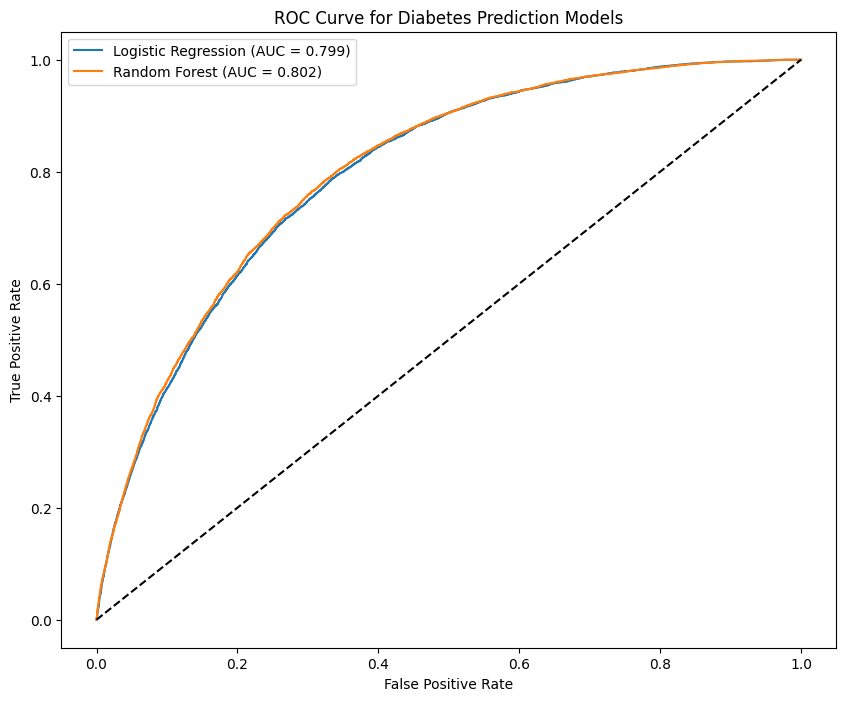

In [ ]:
plt.figure(figsize=(10, 8))
# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_prob):.3f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_prob):.3f})')

# Reference line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction Models')
plt.legend()
plt.show()
# plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.close()


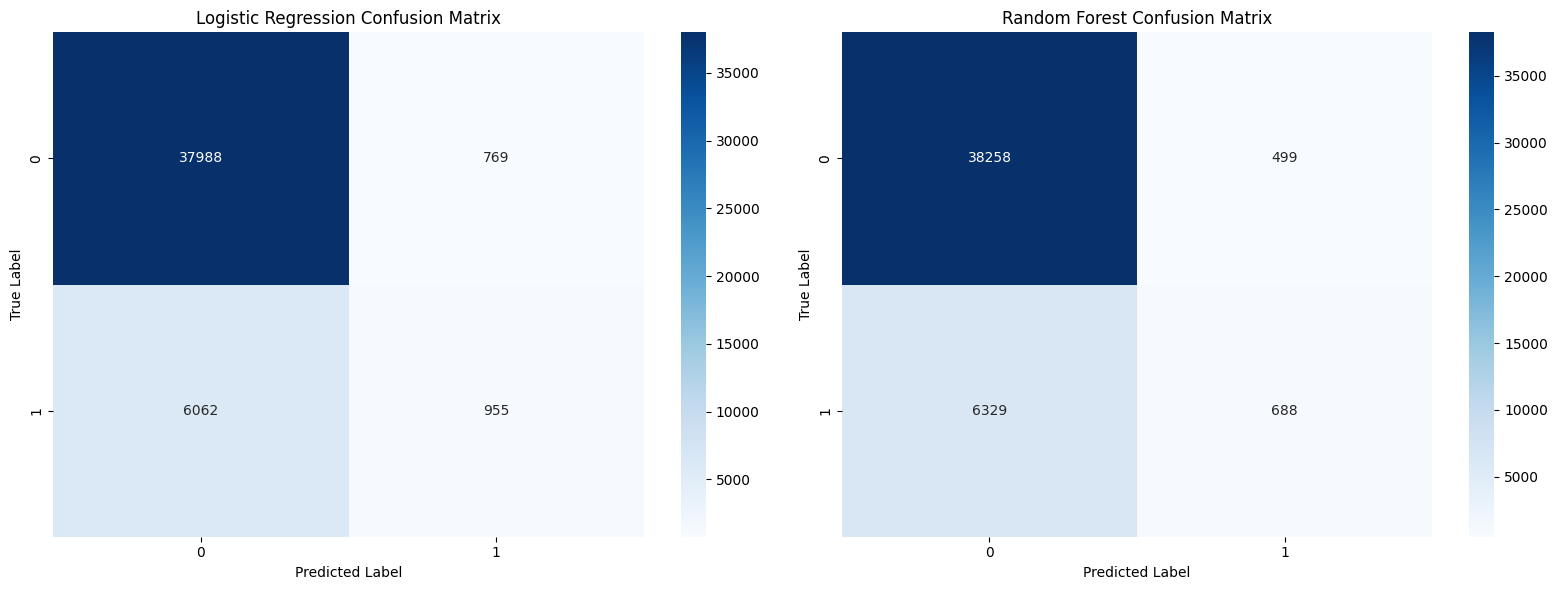

In [ ]:
# Confusion Matrix visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic Regression Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
print("\nKey Insights for Diabetes Prediction:")
print("- Most important risk factors:", ", ".join(top_features[:5]))
print(f"- Best performing model: {'Random Forest' if roc_auc_score(y_test, rf_prob) > roc_auc_score(y_test, lr_prob) else 'Logistic Regression'}")
print(f"- Model accuracy: {max(accuracy_score(y_test, rf_pred), accuracy_score(y_test, lr_pred)):.3f}")
print(f"- Model AUC: {max(roc_auc_score(y_test, rf_prob), roc_auc_score(y_test, lr_prob)):.3f}")


Key Insights for Diabetes Prediction:
- Most important risk factors: BMI, Age, Income, Education, GenHlth
- Best performing model: Random Forest
- Model accuracy: 0.851
- Model AUC: 0.802
